In [4]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt


folder_dir = r"C:\Users\ThinkPad\OneDrive\Documents\Portofolio\flower recognition\dataset"

In [5]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [6]:
data_arr = np.array(data)
label_arr = np.array(label)

In [7]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [9]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

c:\Haifa\Documents\Anaconda\envs\haifanisa\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 32
epochs = 5   

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train)//batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    verbose=1)


Epoch 1/5


c:\Haifa\Documents\Anaconda\envs\haifanisa\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.4139 - loss: 1.2753 - val_accuracy: 0.5550 - val_loss: 0.8730
Epoch 2/5
 1/54 ━━━━━━━━━━━━━━━━━━━━ 3:13 4s/step - accuracy: 0.5000 - loss: 1.0581

c:\Haifa\Documents\Anaconda\envs\haifanisa\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - accuracy: 0.5000 - loss: 1.0581 - val_accuracy: 0.5528 - val_loss: 0.8790
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.5456 - loss: 0.9962 - val_accuracy: 0.6261 - val_loss: 0.7587
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.4375 - loss: 1.1076 - val_accuracy: 0.6261 - val_loss: 0.7401
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.6102 - loss: 0.8641 - val_accuracy: 0.6972 - val_loss: 0.7250


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 445ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 424ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 532ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 573ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 574ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 572ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 568ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 570ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 574ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 565ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 579ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 688ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 625ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 622ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 634ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 626ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 620ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 655ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 645ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 621ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 632ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 653ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 608ms/step
14/14 ━━━━━━━━━━

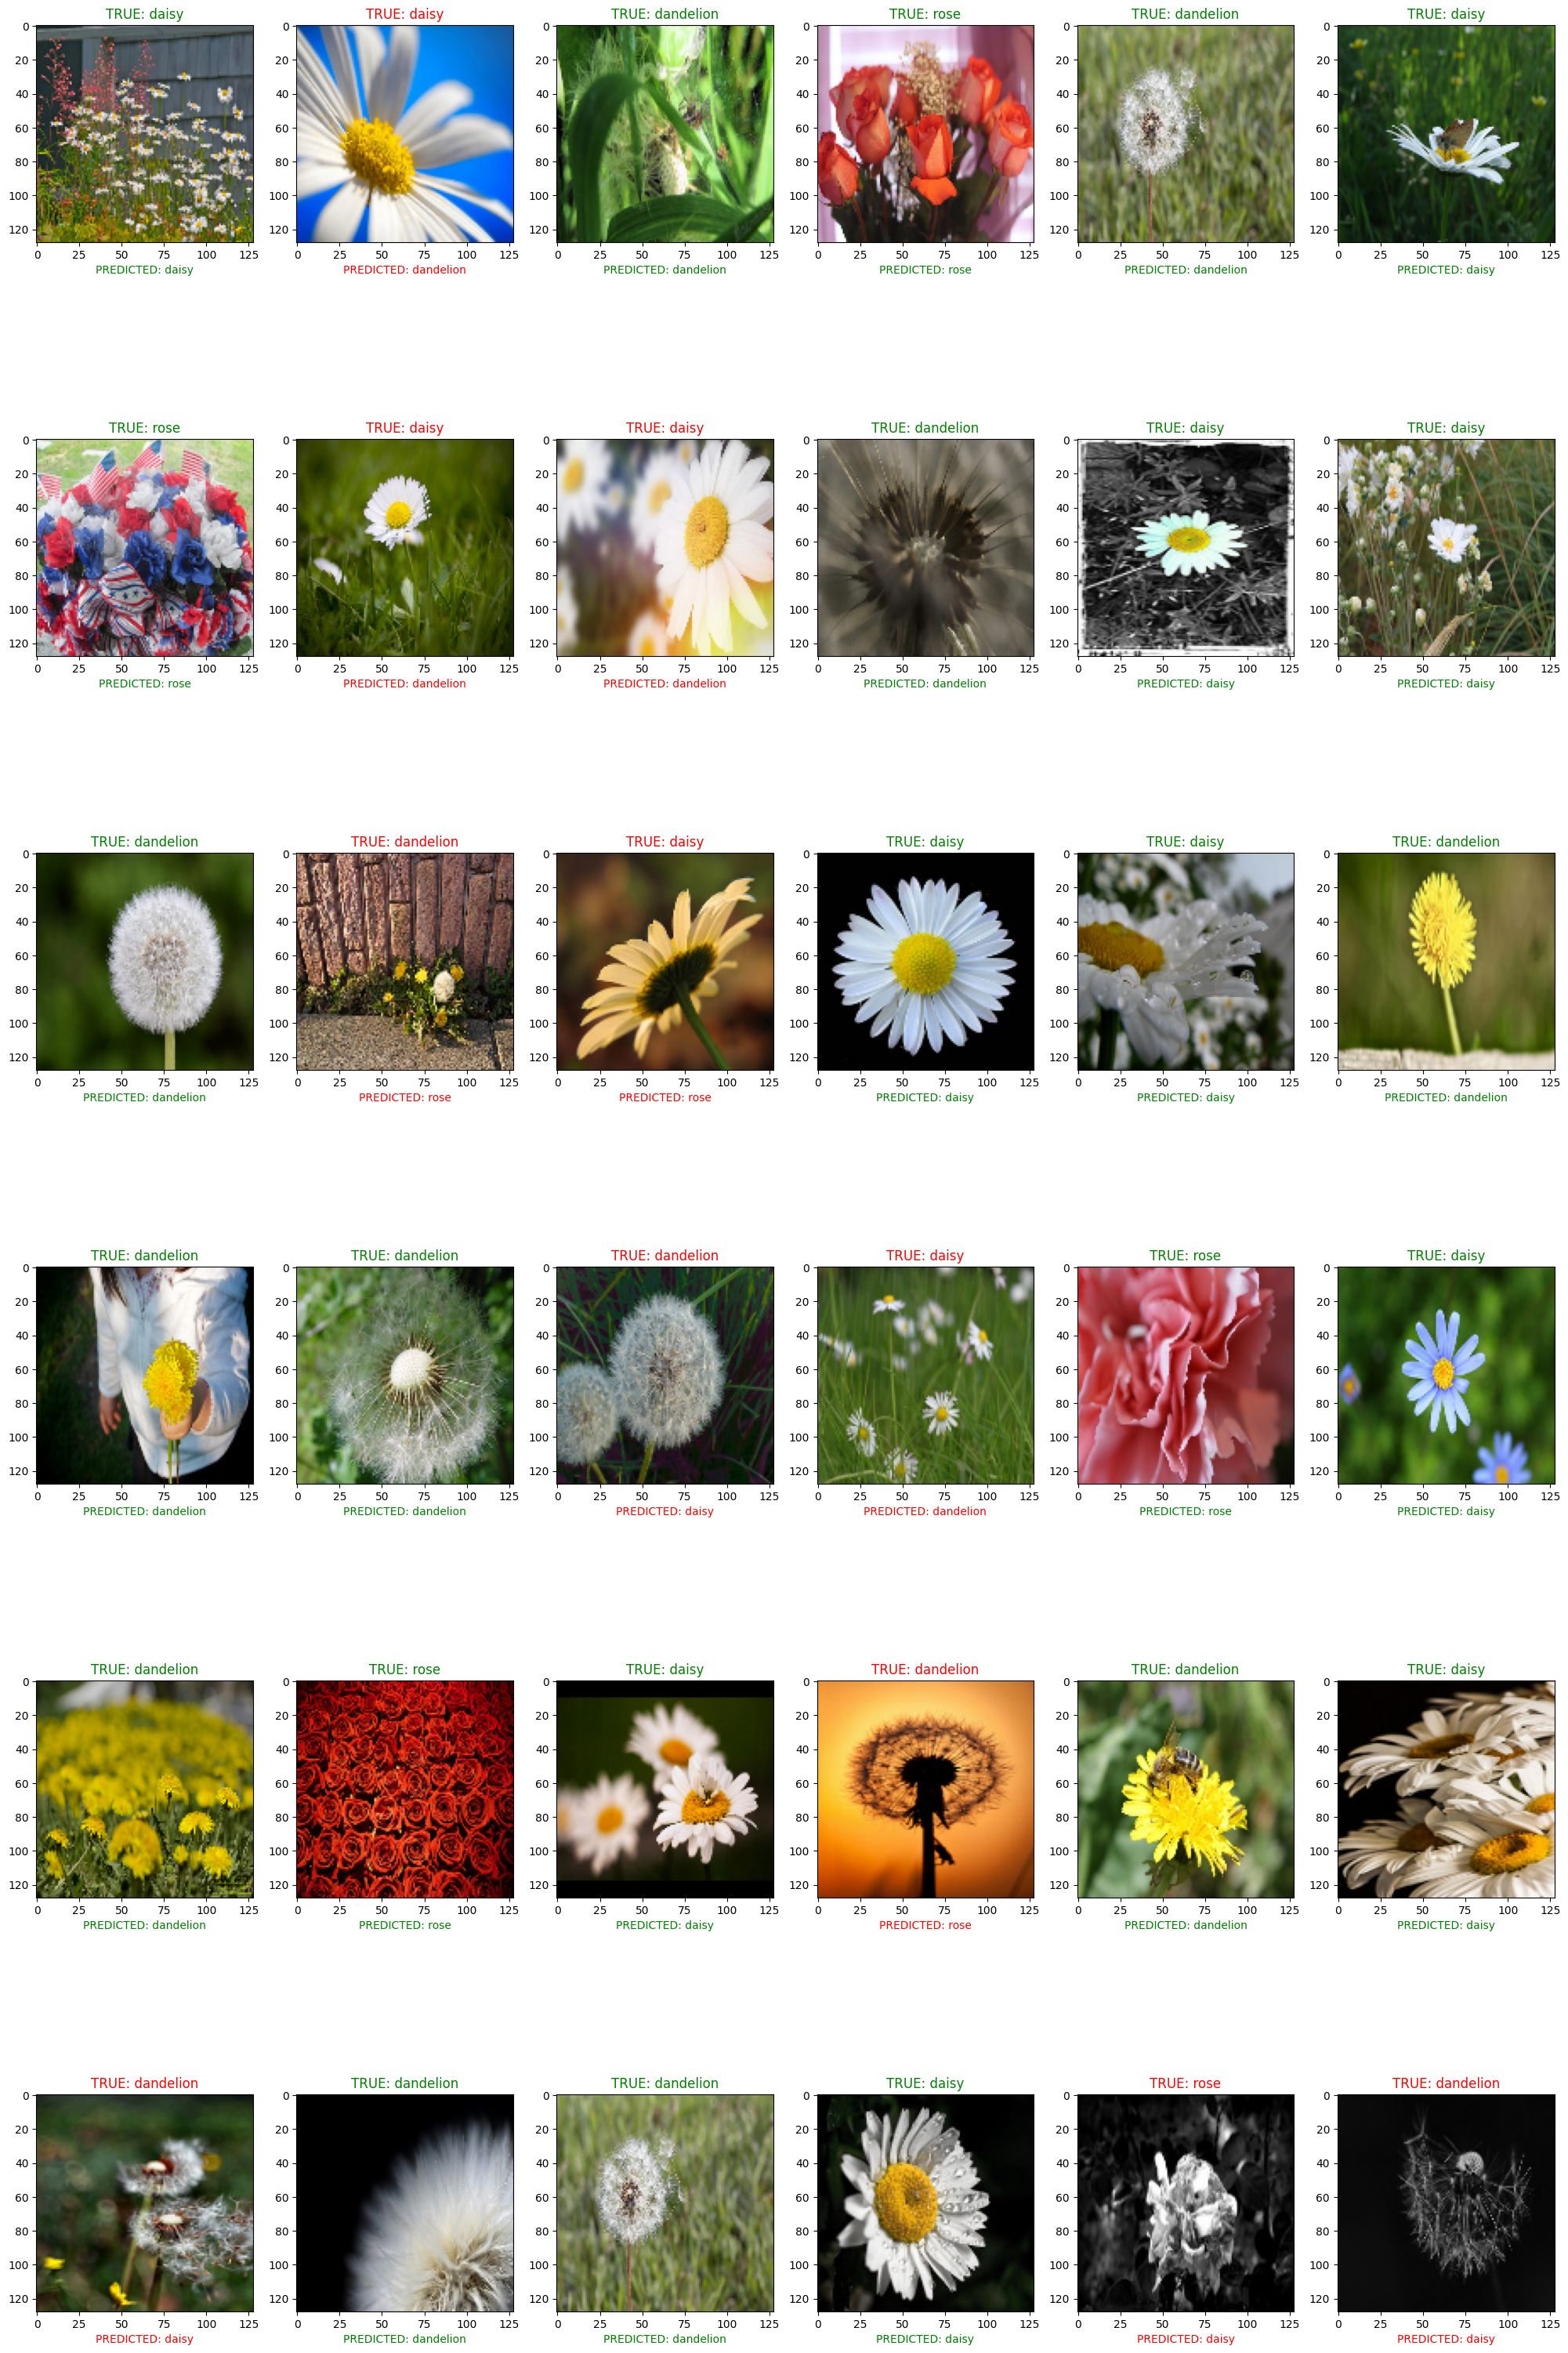

In [14]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')